In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
df_analysis = pd.read_csv('data\dataset_wout_surf_encoded.csv')
df_analysis.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

#### Transforming categorical variables

In [4]:
boolean_cols = df_analysis.columns[df_analysis.columns.str.startswith('has')]
print(boolean_cols)

Index(['hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


In [5]:
df_int_cols = df_analysis.select_dtypes(include='int64').columns
encoded_categories = list(set(df_int_cols) - set(boolean_cols))
encoded_categories.append('locality_encoded')
encoded_categories

['postCode',
 'type_encoded',
 'subtype_encoded',
 'province_encoded',
 'locality_encoded']

In [6]:
for col in encoded_categories:
    df_analysis[col]= df_analysis[col].astype("category")

In [7]:
df_analysis.dtypes

bedroomCount                      float64
bathroomCount                     float64
habitableSurface                  float64
toiletCount                       float64
postCode                         category
totalParkingCount                 float64
province_encoded                 category
type_encoded                     category
subtype_encoded                  category
locality_encoded                 category
epcScore_encoded                  float64
hasAttic_encoded                    int64
hasGarden_encoded                   int64
hasAirConditioning_encoded          int64
hasArmoredDoor_encoded              int64
hasVisiophone_encoded               int64
hasTerrace_encoded                  int64
hasOffice_encoded                   int64
hasSwimmingPool_encoded             int64
hasFireplace_encoded                int64
hasBasement_encoded                 int64
hasDressingRoom_encoded             int64
hasDiningRoom_encoded               int64
hasLift_encoded                   

### Linear Regression

#### Creating the variables

In [38]:
df_analysis.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'postCode', 'totalParkingCount', 'province_encoded', 'type_encoded',
       'subtype_encoded', 'locality_encoded', 'epcScore_encoded',
       'hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded', 'price'],
      dtype='object')

In [39]:
y = df_analysis['price']


##### Optimal feautures according to  correlation 

In [ ]:
X_optimal= df_analysis[
    ['bedroomCount', 
    'bathroomCount',
    'habitableSurface', 
    'toiletCount', 

    'hasOffice_encoded', 
    'hasPhotovoltaicPanels_encoded', 
    'hasHeatPump_encoded', 
    'hasTerrace_encoded',

    'province_encoded',
    'postCode',
    
    'type_encoded',
    'subtype_encoded']
    ]



##### All features except the ones that seem to add noise

In [77]:

X_complete = df_analysis.drop(columns=['price', 'locality_encoded'])


In [54]:
X_complete.dtypes

bedroomCount                      float64
bathroomCount                     float64
habitableSurface                  float64
toiletCount                       float64
totalParkingCount                 float64
province_encoded                 category
type_encoded                     category
subtype_encoded                  category
epcScore_encoded                  float64
hasGarden_encoded                   int64
hasAirConditioning_encoded          int64
hasArmoredDoor_encoded              int64
hasVisiophone_encoded               int64
hasTerrace_encoded                  int64
hasOffice_encoded                   int64
hasSwimmingPool_encoded             int64
hasFireplace_encoded                int64
hasBasement_encoded                 int64
hasDressingRoom_encoded             int64
hasDiningRoom_encoded               int64
hasLift_encoded                     int64
hasHeatPump_encoded                 int64
hasPhotovoltaicPanels_encoded       int64
hasLivingRoom_encoded             

In [78]:
#X = X_optimal
X = X_complete
X.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'postCode', 'totalParkingCount', 'province_encoded', 'type_encoded',
       'subtype_encoded', 'epcScore_encoded', 'hasAttic_encoded',
       'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')

In [79]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded 

bedroomCount  bathroomCount  habitableSurface  toiletCount  \
0               2.0            1.0             100.0          1.0   
1               2.0            1.0              87.0          1.0   
2               2.0            2.0             104.0          2.0   
3               1.0            1.0              71.0          1.0   
4               2.0            1.0              90.0          1.0   
...             ...            ...               ...          ...   
70195           4.0            2.0             242.0          2.0   
70196           3.0            1.0              94.0          1.0   
70197           3.0            1.0             113.0          1.0   
70198           3.0            2.0             111.0          2.0   
70199           3.0            2.0             132.0          2.0   

       totalParkingCount  epcScore_encoded  hasAttic_encoded  \
0                    1.0               5.0                 0   
1                    0.0               2.0                 0   
2                    0.0               6.0                 0   
3                    0.0               3.0                 0   
4                    0.0               4.0                 0   
...                  ...               ...               ...   
70195                3.0               5.0                 0   
70196                0.0               4.0                 0   
70197                0.0               6.0                 0   
70198                0.0               7.0                 0   
70199                2.0               6.0                 0   

       hasGarden_encoded  hasAirConditioning_encoded  hasArmoredDoor_encoded  \
0                      0                           0                       0   
1                      0                           0                       0   
2                      0                           0                       1   
3                      0                           0                       0   
4                      0                           0                       0   
...                  ...                         ...                     ...   
70195                  0                           0                       0   
70196                  0                           0                       0   
70197                  0                           0                       0   
70198                  0                           0                       0   
70199                  0                           0                       0   

       ...  subtype_encoded_15  subtype_encoded_16  subtype_encoded_17  \
0      ...               False               False               False   
1      ...               False               False               False   
2      ...               False               False               False   
3      ...               False               False               False   
4      ...               False               False               False   
...    ...                 ...                 ...                 ...   
70195  ...               False               False               False   
70196  ...               False               False               False   
70197  ...               False               False               False   
70198  ...               False               False               False   
70199  ...               False               False               False   

       subtype_encoded_18  subtype_encoded_19  subtype_encoded_20  \
0                   False               False               False   
1                   False               False               False   
2                   False               False               False   
3                   False               False               False   
4                   False               False               False   
...                   ...                 ...                 ...   
70195               False               False               False   
70196  

#### Splitting the dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#### Fitting the regression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAINING SET: ")
print("R² Score :", model.score(X_train, y_train))


TRAINING SET: 
R² Score : 0.5363648875660809


In [59]:
y_pred = model.predict(X_test)


In [60]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score :", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)



Mean Squared Error: 12497273267.189909
Mean Absolute Error: 82675.16483469753
R² Score : 0.5293930965056728
Intercept: 84279.7848029373


#### Visualizing Results

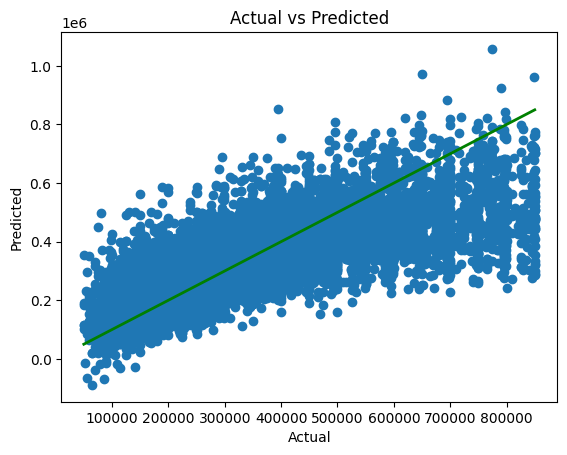

In [61]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

##### Residuals Plot

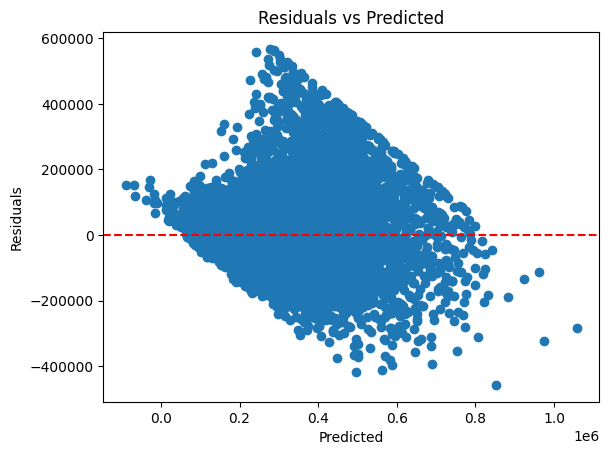

In [62]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

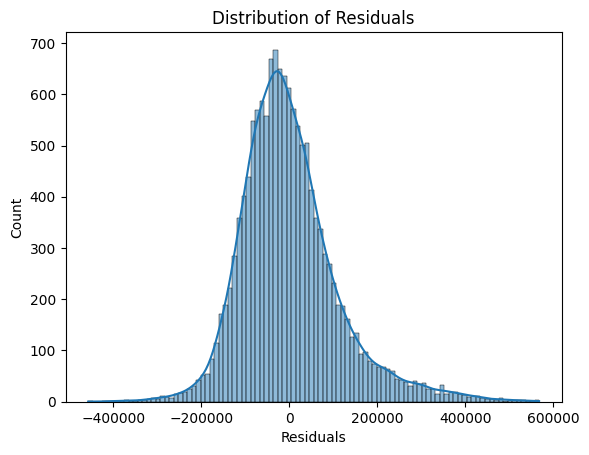

In [63]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [ ]:
### Residuals are seen to have a skewed distribution:
##### Residuals are positive at low predicted values

##### Residuals are negative at high predicted values

In [64]:
feature_names = X_train.columns.tolist()
coef = model.coef_
feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)

print("Linear Regression Coefficients:")
print(feature_importance)

Linear Regression Coefficients:
subtype_encoded_23               121898.757961
subtype_encoded_5                103050.510539
subtype_encoded_12                97731.242831
subtype_encoded_19                78065.872517
subtype_encoded_13                77137.562333
type_encoded_2                    67707.123177
hasSwimmingPool_encoded           59184.421292
subtype_encoded_16                51922.883268
subtype_encoded_9                 47699.324160
subtype_encoded_21                43509.565446
hasFireplace_encoded              41133.407242
hasHeatPump_encoded               39599.825083
bathroomCount                     33765.157075
hasDressingRoom_encoded           33730.930663
subtype_encoded_8                 32964.560430
toiletCount                       31547.532293
hasOffice_encoded                 27987.979922
hasPhotovoltaicPanels_encoded     25503.824937
hasLift_encoded                   23543.779483
bedroomCount                      23467.322836
hasArmoredDoor_encoded      

### Adding interaction features

In [80]:
df_analysis

bedroomCount  bathroomCount  habitableSurface  toiletCount postCode  \
0               2.0            1.0             100.0          1.0     1040   
1               2.0            1.0              87.0          1.0     1040   
2               2.0            2.0             104.0          2.0     1040   
3               1.0            1.0              71.0          1.0     1040   
4               2.0            1.0              90.0          1.0     1040   
...             ...            ...               ...          ...      ...   
70195           4.0            2.0             242.0          2.0     9990   
70196           3.0            1.0              94.0          1.0     1090   
70197           3.0            1.0             113.0          1.0     1853   
70198           3.0            2.0             111.0          2.0     8434   
70199           3.0            2.0             132.0          2.0     2610   

       totalParkingCount province_encoded type_encoded subtype_encoded  \
0                    1.0                1            1               1   
1                    0.0                1            1               1   
2                    0.0                1            1               1   
3                    0.0                1            1               3   
4                    0.0                1            1               1   
...                  ...              ...          ...             ...   
70195                3.0                5            2               2   
70196                0.0                1            1               1   
70197                0.0                4            1               1   
70198                0.0                6            1               1   
70199                2.0                3            1               1   

      locality_encoded  ...  hasSwimmingPool_encoded  hasFireplace_encoded  \
0                951.0  ...                        0                     0   
1                951.0  ...                        0                     0   
2                551.0  ...                        0                     0   
3                951.0  ...                        0                     0   
4                951.0  ...                        0                     0   
...                ...  ...                      ...                   ...   
70195           2106.0  ...                        1                     0   
70196           1652.0  ...                        0                     0   
70197           1243.0  ...                        0                     0   
70198           3633.0  ...                        0                     0   
70199           3685.0  ...                        0                     0   

       hasBasement_encoded  hasDressingRoom_encoded  hasDiningRoom_encoded  \
0                        1                        0                      0   
1                        0                        0                      0   
2                        0                        0                      0   
3                        0                        0                      0   
4                        1                        0                      0   
...                    ...                      ...                    ...   
70195                    0                        0                      0   
70196                    1                        0                      0   
70197                    1                        0                      0   
70198                    0                        0                      0   
70199                    0                        0                      1   

       hasLift_encoded  hasHeatPump_encoded  hasPhotovoltaicPanels_encoded  \
0                    1                    0                              0   
1                    1                    0                              0   
2                    1                    0                              

In [85]:
y = df_analysis['price']

In [82]:
X = df_analysis.drop (columns = ['price'])

In [83]:
X['surface_x_bedrooms'] = X['habitableSurface']*X['bedroomCount']
X['surface_x_bathrooms'] = X['habitableSurface']*X['bathroomCount']
X['bed_x_bath'] = X['bedroomCount']*X['bathroomCount']
X['bath_x_toilet'] = X['bathroomCount']*X['toiletCount']

In [84]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

bedroomCount  bathroomCount  habitableSurface  toiletCount  \
0               2.0            1.0             100.0          1.0   
1               2.0            1.0              87.0          1.0   
2               2.0            2.0             104.0          2.0   
3               1.0            1.0              71.0          1.0   
4               2.0            1.0              90.0          1.0   
...             ...            ...               ...          ...   
70195           4.0            2.0             242.0          2.0   
70196           3.0            1.0              94.0          1.0   
70197           3.0            1.0             113.0          1.0   
70198           3.0            2.0             111.0          2.0   
70199           3.0            2.0             132.0          2.0   

       totalParkingCount  epcScore_encoded  hasAttic_encoded  \
0                    1.0               5.0                 0   
1                    0.0               2.0                 0   
2                    0.0               6.0                 0   
3                    0.0               3.0                 0   
4                    0.0               4.0                 0   
...                  ...               ...               ...   
70195                3.0               5.0                 0   
70196                0.0               4.0                 0   
70197                0.0               6.0                 0   
70198                0.0               7.0                 0   
70199                2.0               6.0                 0   

       hasGarden_encoded  hasAirConditioning_encoded  hasArmoredDoor_encoded  \
0                      0                           0                       0   
1                      0                           0                       0   
2                      0                           0                       1   
3                      0                           0                       0   
4                      0                           0                       0   
...                  ...                         ...                     ...   
70195                  0                           0                       0   
70196                  0                           0                       0   
70197                  0                           0                       0   
70198                  0                           0                       0   
70199                  0                           0                       0   

       ...  locality_encoded_3810.0  locality_encoded_3811.0  \
0      ...                    False                    False   
1      ...                    False                    False   
2      ...                    False                    False   
3      ...                    False                    False   
4      ...                    False                    False   
...    ...                      ...                      ...   
70195  ...                    False                    False   
70196  ...                    False                    False   
70197  ...                    False                    False   
70198  ...                    False                    False   
70199  ...                    False                    False   

       locality_encoded_3812.0  locality_encoded_3813.0  \
0                        False                    False   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False                    False   
...                        ...                      ...   
70195                    False                    False   
70196                    False                    False   
70197                    False                    False   
70198                    False                    False   
70199                    False

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [72]:
#### Fitting the regression
model = LinearRegression()
model.fit(X_train, y_train)
print("TRAINING SET: ")
print("R² Score :", model.score(X_train, y_train))


TRAINING SET: 
R² Score : 0.5481541464328007


In [86]:

y_pred = model.predict(X_test)



In [87]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score :", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)



Mean Squared Error: 12151679883.839014
Mean Absolute Error: 81900.96476493494
R² Score : 0.5424070259068872
Intercept: -26349.797655196802


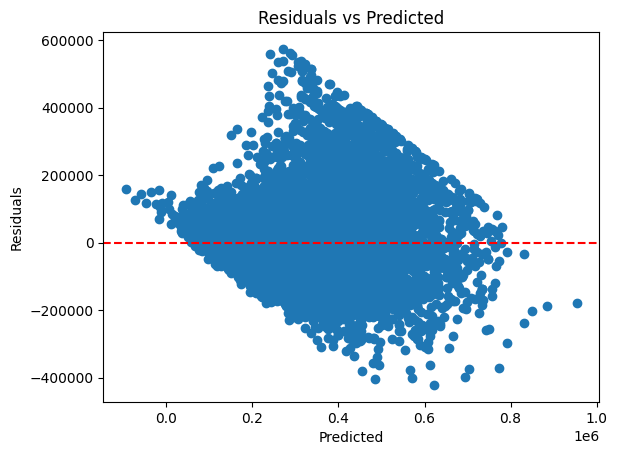

In [75]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [88]:
feature_names = X_train.columns.tolist()
coef = model.coef_
feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False)

print("Linear Regression Coefficients:")
print(feature_importance)

Linear Regression Coefficients:
subtype_encoded_23               163077.341284
bathroomCount                    118836.404485
subtype_encoded_5                 94248.269297
subtype_encoded_12                89646.441205
subtype_encoded_19                72077.759341
subtype_encoded_13                67779.385007
type_encoded_2                    65511.865187
hasSwimmingPool_encoded           59948.512302
subtype_encoded_16                56374.724426
toiletCount                       51169.046366
subtype_encoded_9                 48470.529460
hasFireplace_encoded              41792.937238
hasHeatPump_encoded               39073.291652
bedroomCount                      38066.657267
subtype_encoded_21                37501.734909
hasDressingRoom_encoded           33103.152098
subtype_encoded_8                 29645.144045
hasOffice_encoded                 26477.538146
hasPhotovoltaicPanels_encoded     24525.692438
hasLift_encoded                   22514.112605
epcScore_encoded            

### Standarizing variables

In [33]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline


In [34]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a pipeline: Standardize features → Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 72760.73153323596
MSE: 9699793119.722702
R² Score: 0.6347371536963516


### Polynomial Regression with Ridge

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import pandas as pd


In [ ]:
df_analysis_poly = pd.read_csv('data\dataset_wout_surf_encoded_diff_median.csv')
df_analysis_poly.dtypes


In [ ]:
y_poly = df_analysis_poly['price']


In [ ]:
X_poly = df_analysis_poly.drop(columns = ['price', 'locality_encoded', 'hasAttic_encoded'])
X_poly.dtypes

In [ ]:
boolean_cols = X_poly.columns[X_poly.columns.str.startswith('has')]
print(boolean_cols)

In [ ]:
type(boolean_cols)

In [ ]:
numeric_cols = ['habitableSurface', 'bedroomCount', 'bathroomCount', 'toiletCount']

preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(sparse_output=False), list(boolean_cols)),
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_cols)
    ],
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  
])

In [ ]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [ ]:
model_poly = pipeline.fit(X_train_poly, y_train_poly)
print("TRAINING SET: ")
print("R² Score :", model_poly.score(X_train_poly, y_train_poly))
y_pred_poly = model_poly.predict(X_test_poly)

In [ ]:

print("Mean Squared Error:", mean_squared_error(y_test_poly, y_pred_poly))
print("Mean Absolute Error:", mean_absolute_error(y_test_poly, y_pred_poly))
print("R² Score :", r2_score(y_test_poly, y_pred_poly))




In [ ]:

plt.scatter(y_test_poly, y_pred_poly)
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
residuals_poly = y_test_poly - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


In [ ]:
import seaborn as sns
sns.histplot(residuals_poly, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

### RandomForest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
forest_regressor = RandomForestRegressor(n_estimators=300, random_state=42, oob_score=True)
forest_regressor.fit(X_train, y_train)
print("Random Forest Regression")
print("TRAINING SET: ")
print("R² Score :", forest_regressor.score(X_train, y_train))


Random Forest Regression
TRAINING SET: 
R² Score : 0.9387840481585956


In [99]:
print("OOB Score: ", forest_regressor.oob_score_)
y_pred_forest = forest_regressor.predict(X_test)

OOB Score:  0.6273812921890591


In [100]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_forest))
print("R² Score :", r2_score(y_test, y_pred_forest))


Mean Squared Error: 10092265970.628204
Mean Absolute Error: 70822.62509165416
R² Score : 0.6199578951235926


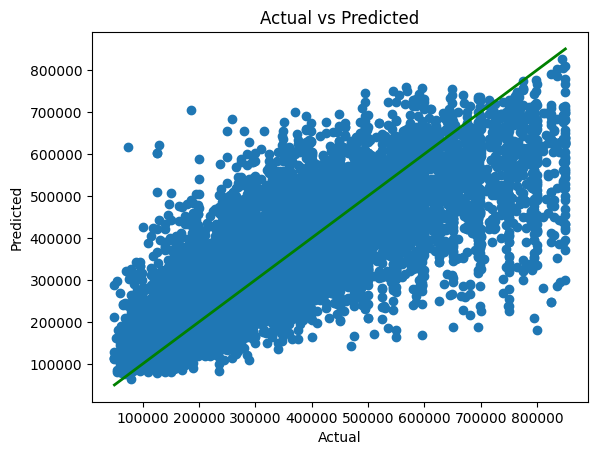

In [101]:
plt.scatter(y_test, y_pred_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

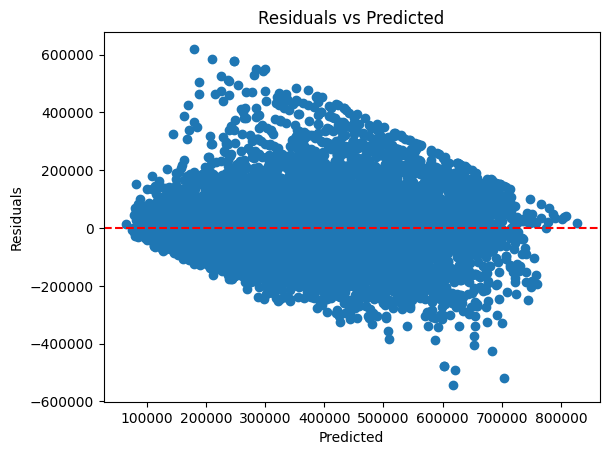

In [102]:
residuals = y_test - y_pred_forest
plt.scatter(y_pred_forest, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

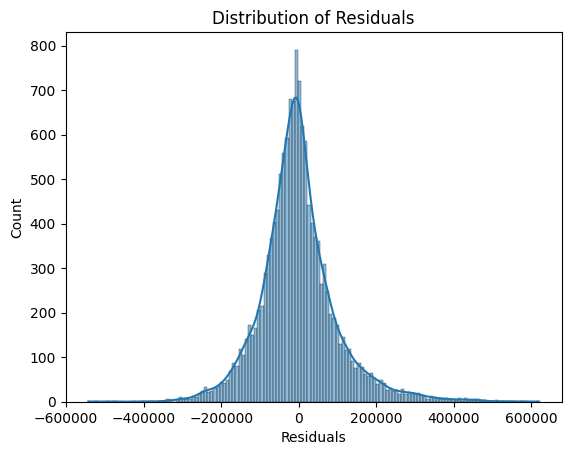

In [103]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [104]:
feature_names = X_train.columns.tolist()
feature_names

['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'toiletCount',
 'totalParkingCount',
 'epcScore_encoded',
 'hasAttic_encoded',
 'hasGarden_encoded',
 'hasAirConditioning_encoded',
 'hasArmoredDoor_encoded',
 'hasVisiophone_encoded',
 'hasTerrace_encoded',
 'hasOffice_encoded',
 'hasSwimmingPool_encoded',
 'hasFireplace_encoded',
 'hasBasement_encoded',
 'hasDressingRoom_encoded',
 'hasDiningRoom_encoded',
 'hasLift_encoded',
 'hasHeatPump_encoded',
 'hasPhotovoltaicPanels_encoded',
 'hasLivingRoom_encoded',
 'surface_x_bedrooms',
 'surface_x_bathrooms',
 'bed_x_bath',
 'bath_x_toilet',
 'province_encoded_2',
 'province_encoded_3',
 'province_encoded_4',
 'province_encoded_5',
 'province_encoded_6',
 'province_encoded_7',
 'province_encoded_8',
 'province_encoded_9',
 'province_encoded_10',
 'province_encoded_11',
 'type_encoded_2',
 'subtype_encoded_2',
 'subtype_encoded_3',
 'subtype_encoded_4',
 'subtype_encoded_5',
 'subtype_encoded_6',
 'subtype_encoded_7',
 'subtype_encod

In [105]:
importances = forest_regressor.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Random Forest Feature Importances:")
print(feature_importance)

Random Forest Feature Importances:
surface_x_bathrooms              3.531201e-01
epcScore_encoded                 9.402344e-02
surface_x_bedrooms               8.662340e-02
habitableSurface                 5.621027e-02
province_encoded_11              4.172231e-02
totalParkingCount                3.376687e-02
province_encoded_7               2.219201e-02
subtype_encoded_13               1.600494e-02
hasTerrace_encoded               1.527605e-02
province_encoded_6               1.514664e-02
subtype_encoded_2                1.475303e-02
hasLivingRoom_encoded            1.338461e-02
hasBasement_encoded              1.319455e-02
bath_x_toilet                    1.290734e-02
bed_x_bath                       1.278496e-02
hasLift_encoded                  1.243863e-02
toiletCount                      1.218230e-02
province_encoded_10              1.080895e-02
hasVisiophone_encoded            1.011402e-02
hasDiningRoom_encoded            9.506418e-03
hasGarden_encoded                8.870521e-03

### Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
X_encoded.dtypes

bedroomCount               float64
bathroomCount              float64
habitableSurface           float64
toiletCount                float64
totalParkingCount          float64
                            ...   
locality_encoded_3815.0       bool
locality_encoded_3816.0       bool
locality_encoded_3817.0       bool
locality_encoded_3818.0       bool
locality_encoded_3819.0       bool
Length: 4892, dtype: object

In [113]:
X_train, X_test, y_train, y_test

(       bedroomCount  bathroomCount  habitableSurface  toiletCount  \
 47022           3.0            1.0             140.0          2.0   
 22124           2.0            1.0             109.0          1.0   
 64894           2.0            1.0             135.0          1.0   
 6631            1.0            1.0              84.0          1.0   
 33321           3.0            2.0             146.0          2.0   
 ...             ...            ...               ...          ...   
 37194           2.0            1.0             177.0          1.0   
 6265            3.0            2.0             174.0          2.0   
 54886           6.0            1.0             140.0          2.0   
 860             3.0            1.0             163.0          1.0   
 15795           4.0            3.0             397.0          3.0   
 
        totalParkingCount  epcScore_encoded  hasAttic_encoded  \
 47022                0.0               1.0                 0   
 22124                1.0   

In [114]:

params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [115]:
grad_boost_reg = GradientBoostingRegressor(**params)
grad_boost_reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5)

In [116]:
print("Gradient Boost Regression")
print("TRAINING SET: ")
print("R² Score :", grad_boost_reg.score(X_train, y_train))  # review this


Gradient Boost Regression
TRAINING SET: 
R² Score : 0.3905743291635262


In [117]:
y_pred_grad_boost = grad_boost_reg.predict(X_test)

In [118]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_grad_boost))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_grad_boost))
print("R² Score :", r2_score(y_test, y_pred_grad_boost))

Mean Squared Error: 16252886488.76438
Mean Absolute Error: 97412.34465583047
R² Score : 0.3879688456998863


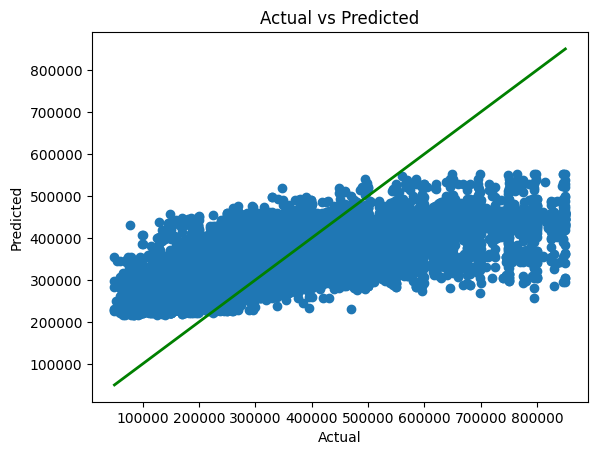

In [119]:
plt.scatter(y_test, y_pred_grad_boost)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [120]:
importances = grad_boost_reg.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("Gradient Boosting Feature Importances:")
print(feature_importance)

Gradient Boosting Feature Importances:
surface_x_bathrooms              0.644265
epcScore_encoded                 0.131575
province_encoded_11              0.082226
surface_x_bedrooms               0.046792
subtype_encoded_13               0.019999
subtype_encoded_2                0.019188
province_encoded_7               0.019026
habitableSurface                 0.011522
bath_x_toilet                    0.010183
hasLift_encoded                  0.004961
hasHeatPump_encoded              0.002493
province_encoded_6               0.002384
bed_x_bath                       0.001898
hasTerrace_encoded               0.001136
province_encoded_10              0.000755
totalParkingCount                0.000556
hasVisiophone_encoded            0.000433
subtype_encoded_7                0.000369
province_encoded_4               0.000171
hasDressingRoom_encoded          0.000042
subtype_encoded_19               0.000025
hasAirConditioning_encoded       0.000000
hasAttic_encoded                 0.00

## XGBoost

In [106]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [107]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 1000, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("R² Score :", r2_score(y_test, pred))

c:\Users\herms\Desktop\BeCode-Bauman\TheHill_Projects\immo-data-regression\challenge-regression\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


Mean Squared Error: 10235657974.690557
Mean Absolute Error: 71640.21228215145
R² Score : 0.6145582158835783


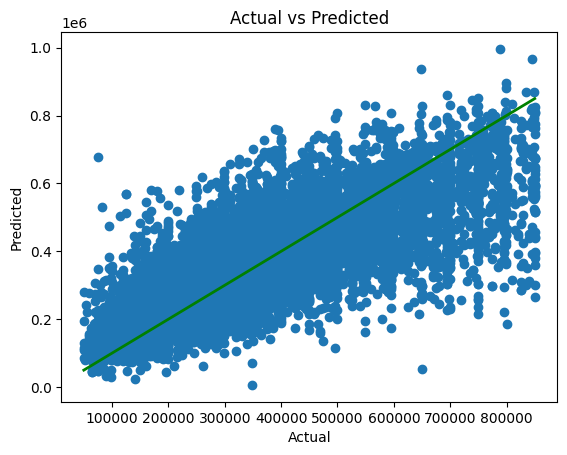

In [108]:
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

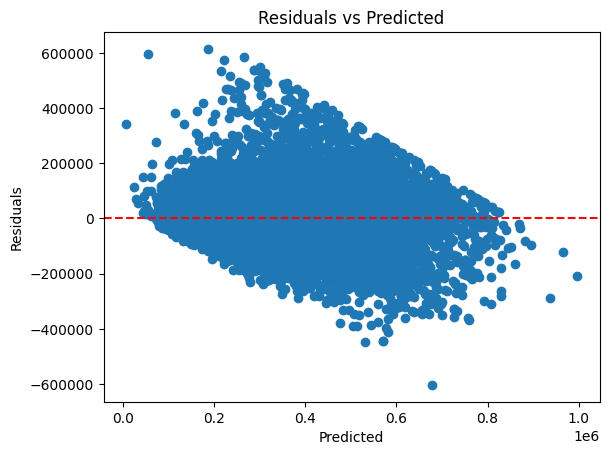

In [109]:
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [110]:
importances = xgb_r.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("XGBoost Feature Importances:")
print(feature_importance)

XGBoost Feature Importances:
province_encoded_11              0.142622
province_encoded_7               0.077982
surface_x_bathrooms              0.068792
province_encoded_10              0.058233
subtype_encoded_13               0.050358
province_encoded_2               0.036783
subtype_encoded_3                0.031493
subtype_encoded_2                0.028900
epcScore_encoded                 0.022885
subtype_encoded_9                0.018907
province_encoded_4               0.018772
hasHeatPump_encoded              0.017933
subtype_encoded_18               0.017134
subtype_encoded_5                0.016922
province_encoded_9               0.016686
hasLift_encoded                  0.015344
hasSwimmingPool_encoded          0.015046
province_encoded_6               0.013710
type_encoded_2                   0.013654
hasFireplace_encoded             0.013515
hasPhotovoltaicPanels_encoded    0.013258
subtype_encoded_19               0.013099
subtype_encoded_21               0.012869
subty